In [2]:
# SDA 2025 - Data Management
# Jiwon Yi

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plot config
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
try:
    df = pd.read_csv(r"C:\Users\infor\Desktop\JiwonYi_SDA2025_Projet_data\snapchat_reviews.csv")
    print("✅ Données chargées:", df.shape)
    display(df.head())
except FileNotFoundError:
    print("❌ File not found: snapchat_reviews.csv")



✅ Données chargées: (212007, 8)


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,b7146eb9-a60d-4a33-9b00-690ed07f4dc3,Sai Nanda,good brother,5,0,NaN,2025-06-13 13:19:59,NaN
1,ecf976fb-475d-45b2-a111-4d6ff22ea8cf,Aqsa Anum,without add kiye public profile walo ko msg ka...,5,0,NaN,2025-06-13 13:19:29,NaN
2,012a5034-af74-41c2-93ac-5cb9ef227910,ProjectBlast,I love everything about snapchat but you guys ...,1,0,NaN,2025-06-13 13:17:47,NaN
3,1c559f0c-02d3-4894-952c-78ebcc2fe961,umme yusuf kamal,nice,5,0,NaN,2025-06-13 13:13:54,NaN
4,b69c6a2e-ead6-4342-8996-f013c35649be,Lovely_charm HEHE,its suitable app bit the ai should be more adv...,5,0,NaN,2025-06-13 13:13:47,NaN


In [3]:
# Informations générales sur le dataset
print("=== Informations générales sur le dataset ===")
print(df.info())
print("\n=== Types de données ===")
print(df.dtypes)
print("\n=== Aperçu des 5 premières lignes ===")
print(df.head())

=== Informations générales sur le dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212007 entries, 0 to 212006
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              212007 non-null  object
 1   userName              212007 non-null  object
 2   content               212004 non-null  object
 3   score                 212007 non-null  int64 
 4   thumbsUpCount         212007 non-null  int64 
 5   reviewCreatedVersion  159980 non-null  object
 6   at                    212007 non-null  object
 7   appVersion            159980 non-null  object
dtypes: int64(2), object(6)
memory usage: 12.9+ MB
None

=== Types de données ===
reviewId                object
userName                object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
appVersion              object
dtyp

In [4]:
# Vérification des valeurs manquantes
print("=== Nombre de valeurs manquantes ===")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Statistiques descriptives pour les variables numériques
print("\n=== Statistiques descriptives des variables numériques ===")
print(df.describe())

=== Nombre de valeurs manquantes ===
reviewId                    0
userName                    0
content                     3
score                       0
thumbsUpCount               0
reviewCreatedVersion    52027
at                          0
appVersion              52027
dtype: int64

Pourcentage de valeurs manquantes:
reviewId                 0.00
userName                 0.00
content                  0.00
score                    0.00
thumbsUpCount            0.00
reviewCreatedVersion    24.54
at                       0.00
appVersion              24.54
dtype: float64

=== Statistiques descriptives des variables numériques ===
               score  thumbsUpCount
count  212007.000000  212007.000000
mean        3.322499      27.373997
std         1.686211     550.444019
min         1.000000       0.000000
25%         1.000000       0.000000
50%         4.000000       0.000000
75%         5.000000       0.000000
max         5.000000   89130.000000


In [5]:
# Analyse de la distribution des scores
print("=== Distribution des scores ===")
print(df['score'].value_counts().sort_index())
print(f"\nScore moyen: {df['score'].mean():.2f}")

# Analyse de la colonne 'at' (dates)
print("\n=== Analyse des dates ===")
print("Type de la colonne 'at':", type(df['at'].iloc[0]))
print("Exemples de dates:", df['at'].head())

# Conversion de la colonne date
df['at'] = pd.to_datetime(df['at'])
print(f"Période couverte: du {df['at'].min()} au {df['at'].max()}")

# Analyse des versions d'app (sans valeurs manquantes)
print("\n=== Versions d'application les plus fréquentes ===")
app_versions = df['appVersion'].value_counts().head(10)
print(app_versions)

=== Distribution des scores ===
score
1    57070
2    18949
3    22606
4    25303
5    88079
Name: count, dtype: int64

Score moyen: 3.32

=== Analyse des dates ===
Type de la colonne 'at': <class 'str'>
Exemples de dates: 0    2025-06-13 13:19:59
1    2025-06-13 13:19:29
2    2025-06-13 13:17:47
3    2025-06-13 13:13:54
4    2025-06-13 13:13:47
Name: at, dtype: object
Période couverte: du 2016-07-31 03:48:42 au 2025-06-13 13:19:59

=== Versions d'application les plus fréquentes ===
appVersion
13.21.0.43    5097
13.17.0.42    4069
12.82.0.51    3408
12.86.0.44    3280
12.81.0.44    2944
12.85.1.0     2549
12.87.0.44    2400
12.79.0.37    2287
12.84.0.40    2229
12.83.0.37    2143
Name: count, dtype: int64


In [6]:
# Vérification des doublons
print("=== Vérification des doublons ===")
print(f"Nombre de doublons complets: {df.duplicated().sum()}")

# Vérification des doublons basés sur reviewId (plus logique)
print(f"Nombre de reviewId dupliqués: {df['reviewId'].duplicated().sum()}")

# Analyse des reviews sans contenu
print(f"\n=== Reviews sans contenu ===")
empty_content = df['content'].isnull().sum()
print(f"Reviews avec contenu vide: {empty_content}")

# Longueur des reviews
df['content_length'] = df['content'].fillna('').astype(str).apply(len)
print(f"\nLongueur moyenne des reviews: {df['content_length'].mean():.1f} caractères")
print(f"Review la plus courte: {df['content_length'].min()} caractères")
print(f"Review la plus longue: {df['content_length'].max()} caractères")

=== Vérification des doublons ===
Nombre de doublons complets: 2341
Nombre de reviewId dupliqués: 4495

=== Reviews sans contenu ===
Reviews avec contenu vide: 3

Longueur moyenne des reviews: 118.6 caractères
Review la plus courte: 0 caractères
Review la plus longue: 1472 caractères


In [7]:
# Suppression des doublons basés sur reviewId (en gardant le premier)
print("=== Nettoyage des doublons ===")
df_clean = df.drop_duplicates(subset=['reviewId'], keep='first')
print(f"Taille avant nettoyage: {df.shape}")
print(f"Taille après nettoyage: {df_clean.shape}")
print(f"Nombre de lignes supprimées: {len(df) - len(df_clean)}")

# Suppression des reviews sans contenu
df_clean = df_clean.dropna(subset=['content'])
print(f"Taille après suppression des contenus vides: {df_clean.shape}")

# Recalcul de la longueur du contenu pour les données nettoyées
df_clean['content_length'] = df_clean['content'].astype(str).apply(len)

print("\n=== Dataset nettoyé prêt ===")
print(f"Taille finale: {df_clean.shape}")

=== Nettoyage des doublons ===
Taille avant nettoyage: (212007, 9)
Taille après nettoyage: (207512, 9)
Nombre de lignes supprimées: 4495
Taille après suppression des contenus vides: (207509, 9)

=== Dataset nettoyé prêt ===
Taille finale: (207509, 9)


In [8]:
# Installation de textblob
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\infor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:

!pip install textblob nltk

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\infor\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import re
from datetime import datetime

print("=== Création des nouvelles variables (méthode alternative) ===")

# Variable 1: Analyse de sentiment simple (basée sur des mots-clés)
print("1. Création de la variable sentiment...")

def simple_sentiment_analysis(text):
    """Analyse simple du sentiment basée sur des mots-clés"""
    if pd.isna(text) or text == '':
        return 0
    
    text = str(text).lower()
    
    # Mots positifs
    positive_words = ['good', 'great', 'excellent', 'amazing', 'love', 'perfect', 'awesome', 
                     'fantastic', 'wonderful', 'best', 'nice', 'cool', 'fun', 'happy']
    
    # Mots négatifs  
    negative_words = ['bad', 'terrible', 'awful', 'hate', 'worst', 'horrible', 'stupid',
                     'boring', 'slow', 'crash', 'bug', 'problem', 'issue', 'annoying']
    
    positive_count = sum(1 for word in positive_words if word in text)
    negative_count = sum(1 for word in negative_words if word in text)
    
    if positive_count > negative_count:
        return 1  # Positif
    elif negative_count > positive_count:
        return -1  # Négatif
    else:
        return 0  # Neutre

df_clean['sentiment_score'] = df_clean['content'].apply(simple_sentiment_analysis)

def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Négatif'
    else:
        return 'Neutre'

df_clean['sentiment_category'] = df_clean['sentiment_score'].apply(categorize_sentiment)

print("   Variable sentiment créée avec succès!")
print("   Distribution des sentiments:")
print(df_clean['sentiment_category'].value_counts())

# Variable 2: Catégorie de longueur des reviews
print("\n2. Création de la variable catégorie de longueur...")

def categorize_length(length):
    if length < 50:
        return 'Courte'
    elif length < 150:
        return 'Moyenne'
    else:
        return 'Longue'

df_clean['length_category'] = df_clean['content_length'].apply(categorize_length)

print("   Variable longueur créée avec succès!")
print("   Distribution des longueurs:")
print(df_clean['length_category'].value_counts())

# Variable 3: Période temporelle
print("\n3. Création de la variable période temporelle...")

df_clean['year'] = df_clean['at'].dt.year
df_clean['month'] = df_clean['at'].dt.month
df_clean['year_month'] = df_clean['at'].dt.to_period('M')

def categorize_period(date):
    year = date.year
    if year <= 2018:
        return 'Période ancienne (2016-2018)'
    elif year <= 2021:
        return 'Période moyenne (2019-2021)'
    else:
        return 'Période récente (2022-2025)'

df_clean['period_category'] = df_clean['at'].apply(categorize_period)

print("   Variable période créée avec succès!")
print("   Distribution des périodes:")
print(df_clean['period_category'].value_counts())

# Variable 4: Ratio d'engagement
print("\n4. Création de la variable ratio d'engagement...")

df_clean['engagement_ratio'] = df_clean['thumbsUpCount'] / (df_clean['score'] + 0.1)

def categorize_engagement(ratio):
    if ratio == 0:
        return 'Pas d\'engagement'
    elif ratio < 5:
        return 'Faible engagement'
    elif ratio < 20:
        return 'Engagement moyen'
    else:
        return 'Fort engagement'

df_clean['engagement_category'] = df_clean['engagement_ratio'].apply(categorize_engagement)

print("   Variable engagement créée avec succès!")
print("   Distribution de l'engagement:")
print(df_clean['engagement_category'].value_counts())

print(f"\n=== Résumé final ===")
print(f"Dataset final: {df_clean.shape}")
print(f"Nouvelles variables créées: 8")

=== Création des nouvelles variables (méthode alternative) ===
1. Création de la variable sentiment...
   Variable sentiment créée avec succès!
   Distribution des sentiments:
sentiment_category
Positif    88131
Neutre     87402
Négatif    31976
Name: count, dtype: int64

2. Création de la variable catégorie de longueur...
   Variable longueur créée avec succès!
   Distribution des longueurs:
length_category
Courte     79398
Longue     64595
Moyenne    63516
Name: count, dtype: int64

3. Création de la variable période temporelle...
   Variable période créée avec succès!
   Distribution des périodes:
period_category
Période récente (2022-2025)     150609
Période moyenne (2019-2021)      52120
Période ancienne (2016-2018)      4780
Name: count, dtype: int64

4. Création de la variable ratio d'engagement...
   Variable engagement créée avec succès!
   Distribution de l'engagement:
engagement_category
Pas d'engagement     157579
Faible engagement     37008
Fort engagement        6941
Enga

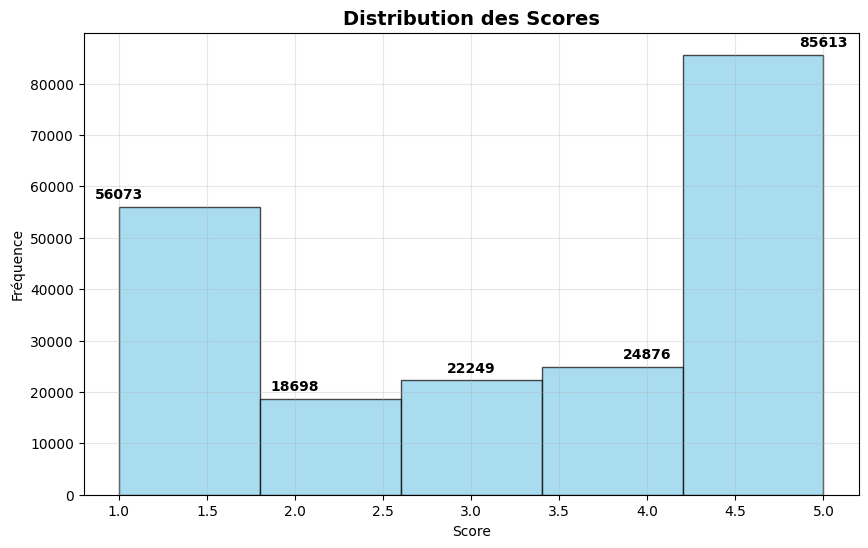

In [52]:
# Configuration pour de beaux graphiques
plt.style.use('default')
sns.set_palette("husl")

# 1. Distribution des scores
plt.figure(figsize=(10, 6))
plt.hist(df_clean['score'], bins=5, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution des Scores', fontsize=14, fontweight='bold')
plt.xlabel('Score')
plt.ylabel('Fréquence')
plt.grid(True, alpha=0.3)
for i in range(1, 6):
    count = (df_clean['score'] == i).sum()
    plt.text(i, count + 1000, str(count), ha='center', va='bottom', fontweight='bold')
plt.show()

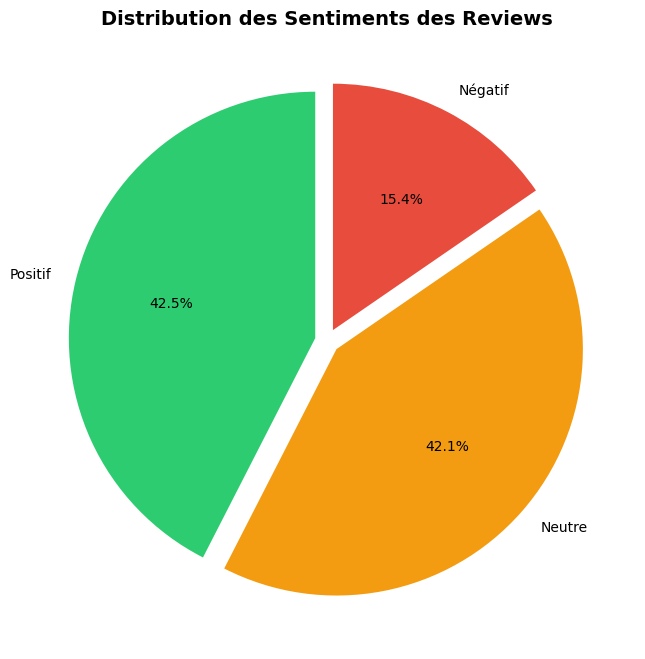

In [53]:
# 2. Distribution des sentiments (pie chart amélioré)
plt.figure(figsize=(10, 8))
sentiment_counts = df_clean['sentiment_category'].value_counts()
colors = ['#2ecc71', '#f39c12', '#e74c3c']  # Vert, Orange, Rouge
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))
plt.title('Distribution des Sentiments des Reviews', fontsize=14, fontweight='bold')
plt.show()

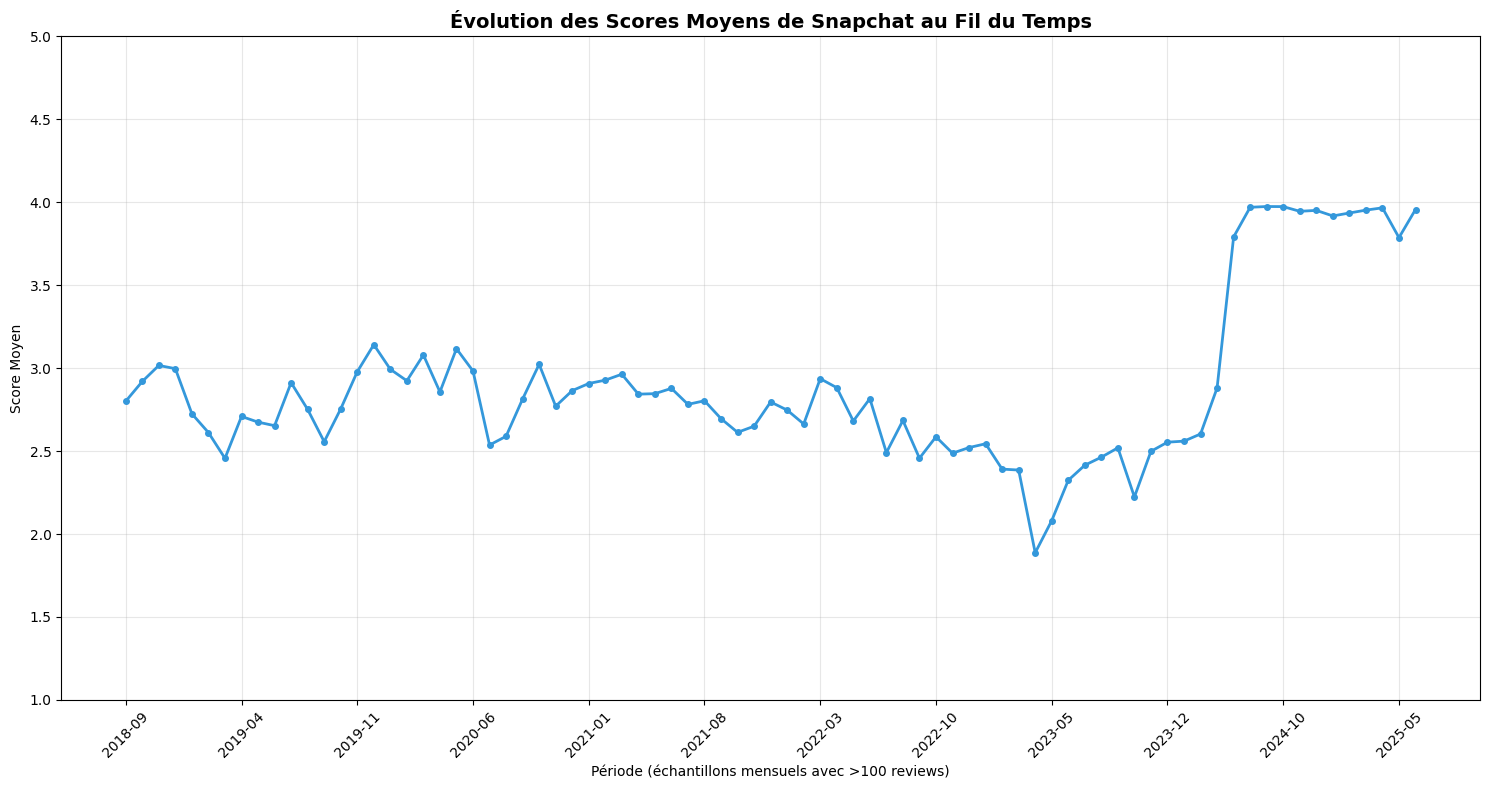

Score moyen global: 3.31
Score le plus bas (mensuel): 1.89
Score le plus élevé (mensuel): 3.97


In [54]:
# 3. Évolution temporelle des scores moyens (améliorée)
plt.figure(figsize=(15, 8))
monthly_scores = df_clean.groupby('year_month')['score'].mean()
monthly_counts = df_clean.groupby('year_month').size()

# Filtrer pour avoir au moins 100 reviews par mois (pour plus de fiabilité)
reliable_months = monthly_counts[monthly_counts >= 100].index
filtered_scores = monthly_scores[reliable_months]

plt.plot(range(len(filtered_scores)), filtered_scores.values, 
         marker='o', linewidth=2, markersize=4, color='#3498db')
plt.title('Évolution des Scores Moyens de Snapchat au Fil du Temps', 
          fontsize=14, fontweight='bold')
plt.xlabel('Période (échantillons mensuels avec >100 reviews)')
plt.ylabel('Score Moyen')
plt.grid(True, alpha=0.3)
plt.ylim(1, 5)

# Ajouter quelques points de référence
step = max(1, len(filtered_scores) // 10)
xticks_pos = range(0, len(filtered_scores), step)
xticks_labels = [str(filtered_scores.index[i]) for i in xticks_pos]
plt.xticks(xticks_pos, xticks_labels, rotation=45)

plt.tight_layout()
plt.show()

print(f"Score moyen global: {df_clean['score'].mean():.2f}")
print(f"Score le plus bas (mensuel): {filtered_scores.min():.2f}")
print(f"Score le plus élevé (mensuel): {filtered_scores.max():.2f}")

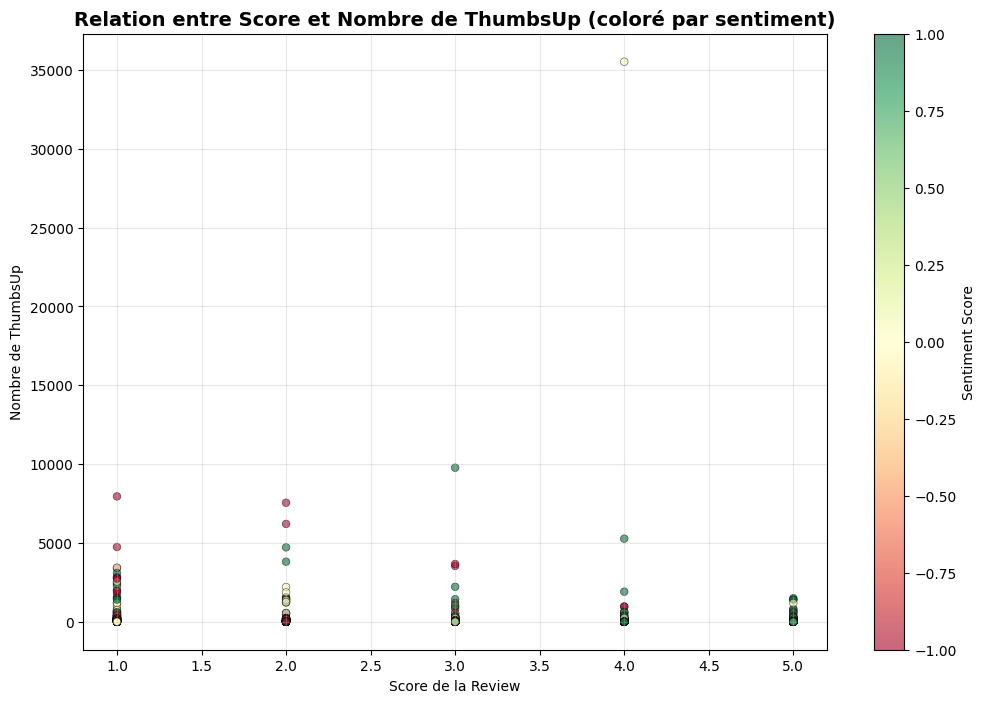

In [55]:
# 4. Relation Score vs Engagement (scatter plot amélioré)
plt.figure(figsize=(12, 8))
# Utiliser un échantillon pour la lisibilité
sample_size = min(10000, len(df_clean))
sample_df = df_clean.sample(n=sample_size, random_state=42)

scatter = plt.scatter(sample_df['score'], sample_df['thumbsUpCount'], 
                     alpha=0.6, s=30, c=sample_df['sentiment_score'], 
                     cmap='RdYlGn', edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Sentiment Score')
plt.title('Relation entre Score et Nombre de ThumbsUp (coloré par sentiment)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Score de la Review')
plt.ylabel('Nombre de ThumbsUp')
plt.grid(True, alpha=0.3)
plt.show()

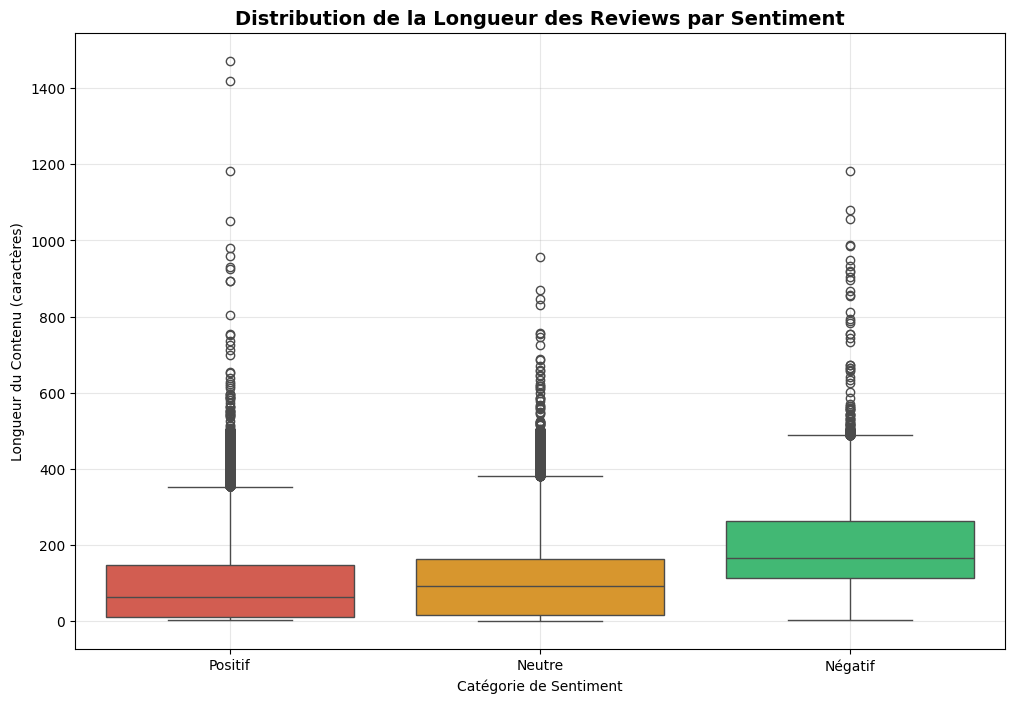

=== Longueur moyenne par sentiment ===
                     mean  median    std
sentiment_category                      
Neutre              111.4    91.0  112.0
Négatif             198.3   165.0  126.2
Positif              99.4    62.0  111.2


In [57]:
# 5. Distribution des longueurs par sentiment
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='sentiment_category', y='content_length', 
            palette=['#e74c3c', '#f39c12', '#2ecc71'])
plt.title('Distribution de la Longueur des Reviews par Sentiment', 
          fontsize=14, fontweight='bold')
plt.xlabel('Catégorie de Sentiment')
plt.ylabel('Longueur du Contenu (caractères)')
plt.grid(True, alpha=0.3)
plt.show()

# Statistiques par sentiment
print("=== Longueur moyenne par sentiment ===")
length_by_sentiment = df_clean.groupby('sentiment_category')['content_length'].agg(['mean', 'median', 'std'])
print(length_by_sentiment.round(1))

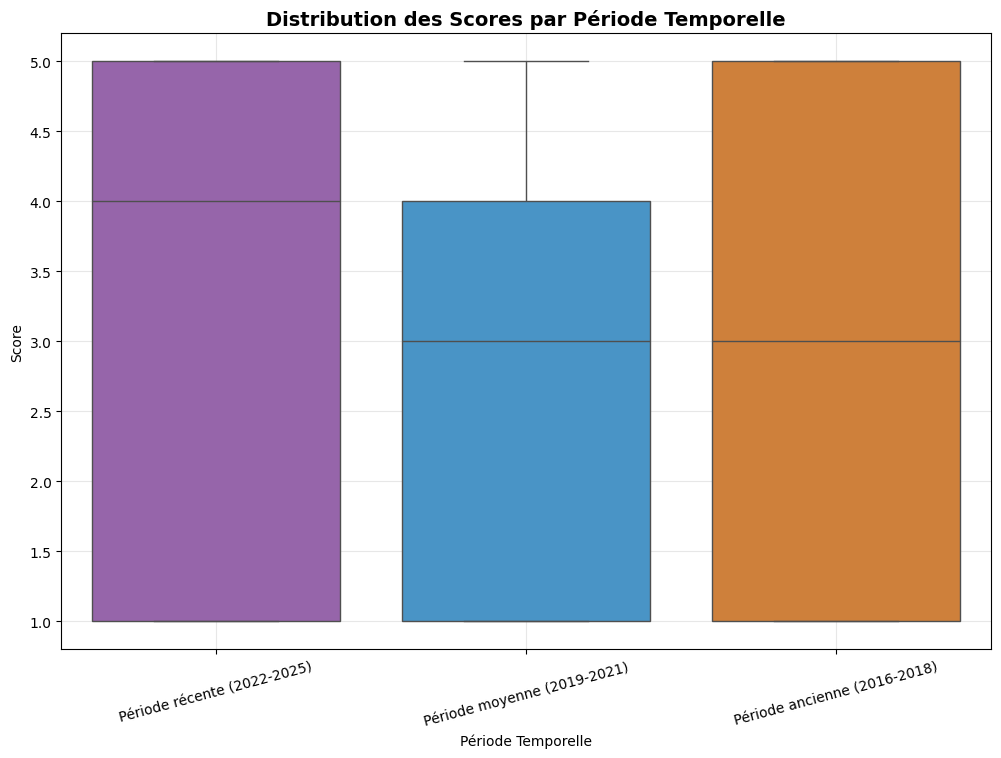

=== Score moyen par période ===
                              mean  median   count
period_category                                   
Période ancienne (2016-2018)  2.95     3.0    4780
Période moyenne (2019-2021)   2.79     3.0   52120
Période récente (2022-2025)   3.51     4.0  150609


In [58]:
# 6. Scores par période temporelle
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_clean, x='period_category', y='score', 
            palette=['#9b59b6', '#3498db', '#e67e22'])
plt.title('Distribution des Scores par Période Temporelle', 
          fontsize=14, fontweight='bold')
plt.xlabel('Période Temporelle')
plt.ylabel('Score')
plt.xticks(rotation=15)
plt.grid(True, alpha=0.3)
plt.show()

# Statistiques par période
print("=== Score moyen par période ===")
score_by_period = df_clean.groupby('period_category')['score'].agg(['mean', 'median', 'count'])
print(score_by_period.round(2))

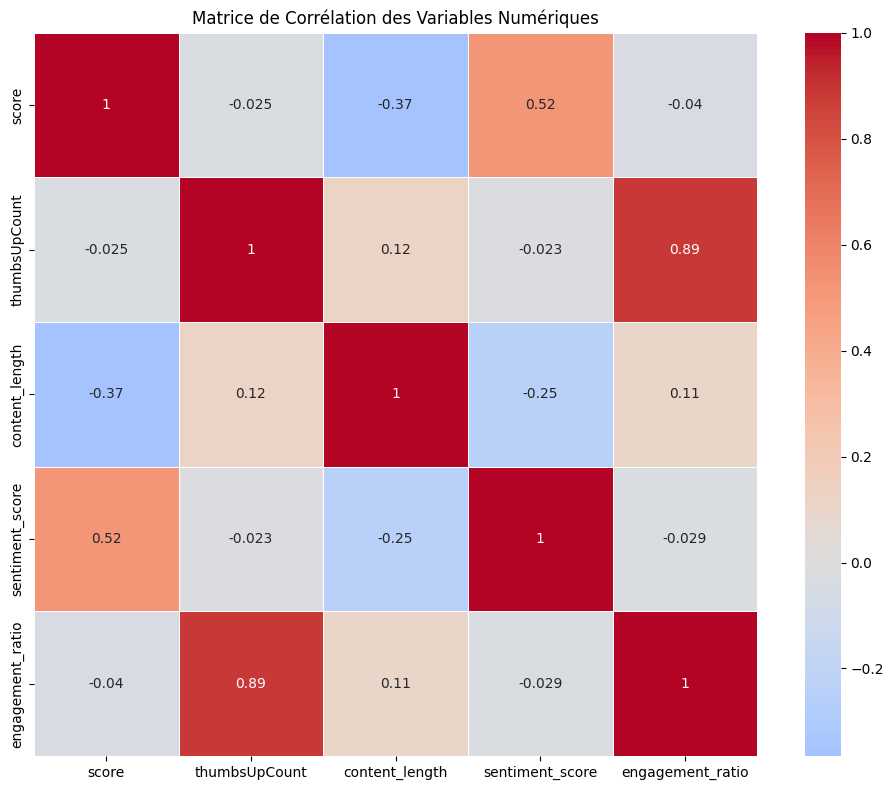

=== Corrélations les plus fortes ===
engagement_ratio  thumbsUpCount       0.887880
thumbsUpCount     engagement_ratio    0.887880
score             sentiment_score     0.523502
sentiment_score   score               0.523502
score             content_length      0.365510
content_length    score               0.365510
                  sentiment_score     0.245113
sentiment_score   content_length      0.245113
content_length    thumbsUpCount       0.120405
thumbsUpCount     content_length      0.120405
dtype: float64


In [59]:
# Matrice de corrélation pour les variables numériques
numeric_cols = ['score', 'thumbsUpCount', 'content_length', 'sentiment_score', 'engagement_ratio']
correlation_matrix = df_clean[numeric_cols].corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Matrice de Corrélation des Variables Numériques')
plt.tight_layout()
plt.show()

# Affichage des corrélations les plus importantes
print("=== Corrélations les plus fortes ===")
# Extraction des corrélations (sans la diagonal)
corr_values = correlation_matrix.abs().unstack()
corr_values = corr_values[corr_values != 1.0].sort_values(ascending=False)
print(corr_values.head(10))

In [60]:
# Sauvegarde du dataset final nettoyé
print("=== Sauvegarde du dataset nettoyé ===")

# Affichage des colonnes finales
print("Colonnes dans le dataset final:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i:2d}. {col}")

# Sauvegarde en CSV
output_path = r"C:\Users\infor\Desktop\snapchat_reviews_clean.csv"
df_clean.to_csv(output_path, index=False, encoding='utf-8')
print(f"\nDataset sauvegardé: {output_path}")
print(f"Taille finale: {df_clean.shape}")

# Résumé des transformations effectuées
print("\n=== Résumé des transformations ===")
print("✓ Suppression des doublons (4,495 lignes)")
print("✓ Suppression des reviews sans contenu (3 lignes)")
print("✓ Conversion des dates en format datetime")
print("✓ Création de 8 nouvelles variables:")
print("  - sentiment_score et sentiment_category")
print("  - length_category") 
print("  - year, month, year_month")
print("  - period_category")
print("  - engagement_ratio et engagement_category")

=== Sauvegarde du dataset nettoyé ===
Colonnes dans le dataset final:
 1. reviewId
 2. userName
 3. content
 4. score
 5. thumbsUpCount
 6. reviewCreatedVersion
 7. at
 8. appVersion
 9. content_length
10. sentiment_score
11. sentiment_category
12. length_category
13. year
14. month
15. year_month
16. period_category
17. engagement_ratio
18. engagement_category

Dataset sauvegardé: C:\Users\infor\Desktop\snapchat_reviews_clean.csv
Taille finale: (207509, 18)

=== Résumé des transformations ===
✓ Suppression des doublons (4,495 lignes)
✓ Suppression des reviews sans contenu (3 lignes)
✓ Conversion des dates en format datetime
✓ Création de 8 nouvelles variables:
  - sentiment_score et sentiment_category
  - length_category
  - year, month, year_month
  - period_category
  - engagement_ratio et engagement_category


In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import os
import re
from collections import Counter  

In [69]:
# Vérification des valeurs manquantes
print("=== Nombre de valeurs manquantes ===")
print(df.isnull().sum())
print(f"\nPourcentage de valeurs manquantes:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Statistiques descriptives pour les variables numériques
print("\n=== Statistiques descriptives des variables numériques ===")
print(df.describe())

=== Nombre de valeurs manquantes ===
reviewId               0
userName               0
score                  0
thumbsUpCount          0
at                     0
appVersion             0
content                0
content_length         0
sentiment_score        0
sentiment_category     0
length_category        0
period_category        0
engagement_ratio       0
engagement_category    0
dtype: int64

Pourcentage de valeurs manquantes:
reviewId               0.0
userName               0.0
score                  0.0
thumbsUpCount          0.0
at                     0.0
appVersion             0.0
content                0.0
content_length         0.0
sentiment_score        0.0
sentiment_category     0.0
length_category        0.0
period_category        0.0
engagement_ratio       0.0
engagement_category    0.0
dtype: float64

=== Statistiques descriptives des variables numériques ===
             score  thumbsUpCount                   at  content_length  \
count  1000.000000    1000.000000    